Andres David Gomez- Particulas!

In [5]:
import math
delta=0.01

Q1=[[],[],[]]
Q2=[[],[],[]]


def E(x1,y1,z1,x2,y2,z2,q1,q2):
	
	k=q1*q2/(math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2))**3	
	return[k*(x1-x2),k*(y1-y2),k*(z1-z2)]


def F(x1,y1,z1,vx1,vy1,vz1,x2,y2,z2,q1,q2):
	
	fx=E(x1,y1,z1,x2,y2,z2,q1,q2)[0]+q1*vy1*10.0
	fy=E(x1,y1,z1,x2,y2,z2,q1,q2)[1]-q1*vx1*10.0
	fz=E(x1,y1,z1,x2,y2,z2,q1,q2)[2]
 
	return [fx,fy,fz]

class Particula:

	#Attribute
	carga = True
	
	#Initializer
	
	def __init__(self,x,y,z,vx,vy,vz,m,carga):
	
		self.X=x
		self.Y=y
		self.Z=z
		self.VX=vx
		self.VY=vy
		self.VZ=vz
		self.M= m
		self.Carga= carga

	#instance method
	
	def avanzar(self, F,P):
		
		
		self.VX=self.VX+ F(self.X, self.Y, self.Z, self.VX, self.VY, self.VZ, P.X, P.Y, P.Z, self.Carga, P.Carga)[0]*delta/self.M
		self.VY=self.VY+ F(self.X, self.Y, self.Z, self.VX, self.VY, self.VZ, P.X, P.Y, P.Z, self.Carga, P.Carga)[1]*delta/self.M
		self.VZ=self.VZ+ F(self.X, self.Y, self.Z, self.VX, self.VY, self.VZ, P.X, P.Y, P.Z, self.Carga, P.Carga)[2]*delta/self.M

		self.X=self.X + self.VX*delta
		self.Y=self.Y + self.VY*delta
		self.Z=self.Z + self.VZ*delta

particula1=Particula(0,0,0,0,0,0,10.,-1.)
particula2=Particula(1,0,0,0,0,0,10.,1.)



for i in range(10000):
	particula1.avanzar(F,particula2)
	particula2.avanzar(F,particula1)
	Q1[0].append(particula1.X)
	Q1[1].append(particula1.Y)
	Q1[2].append(particula1.Z)
	Q2[0].append(particula2.X)
	Q2[1].append(particula2.Y)
	Q2[2].append(particula2.Z)


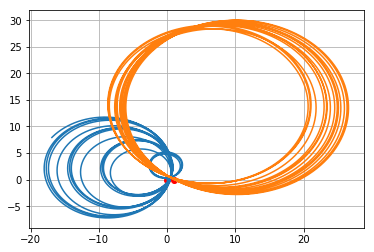

In [6]:
import matplotlib.pyplot as plt
plt.plot(Q1[0][0],Q1[1][0], 'ro')
plt.plot(Q1[0],Q1[1])
plt.plot(Q2[0][0],Q2[1][0], 'ro')
plt.plot(Q2[0],Q2[1])
plt.grid()
plt.show()